In [238]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [239]:
pi = math.pi
g = 9.81 #m/s^2
rho = 1030 #kg/m^2

-----------------


Question 2

Given: \
wave height = 3.50 m \
period = 10.0-s \
depth = 30.0 m

Find:  \
(a) wavelength approximated with Fenton and McKee \
(b) wavelength assuming deepwater \
(c) wavelength exactly with linear dispersion

Solution:

(a)

In [240]:
H = 3.50 #m
h = 30.0 #m
T = 10.0 #-s

In [241]:
L1 = ((g*T**2)/(2*pi))*(math.tanh((((2*pi)/T)*((h/g)**0.5))**(3/2)))**(2/3) #fenton mckee
L1

136.59749917235396

In [242]:
print('The wavelength, approximated by Fenton and Mckee, is {0: .0f} m'.format(L1))

The wavelength, approximated by Fenton and Mckee, is  137 m


----------------
(b)

In [243]:
L2 = (g * (T**2)) / (2 * pi)
L2

156.13099917314932

In [244]:
print('The wavelength, assuming deepwater limit, is {0: .0f} m'.format(L2))

The wavelength, assuming deepwater limit, is  156 m


------------------
(c)

In [245]:
# Dispersion iteration
# code source: adapted with help from Steven Hoagland

sol = [0]
solindex = 0

iteration = 0
initial_guess = 57.9 # input initial wavelength guess
L = initial_guess

_break = True

while _break == True: 
    previous_guess = L
    k = (2*pi)/L
    L = ((g * (T**2)) / (2*pi)) * math.tanh(k * h)
    error = abs(L-previous_guess) # calculate errorp
    if (error <= 0.000000001) or (error == 0): # break when the error threshold is met
        _break = False
    iteration += 1

sol[solindex] = L #converged solution added
solindex += 1

In [246]:
L3 = sol[0]
L3

137.29489294688142

In [247]:
print('The wavelength, solved by dispersion, is {0: .0f} m'.format(L3))

The wavelength, solved by dispersion, is  137 m


---------
Discussion: \
The Fenton and McKee approximation si accurate to the fully solved dispersion equation by 0.5%. This is a good approximation and is in line with the theory that the approximation is valid within an error of 2%. 
The approximation assuming deepwater limit, however, has an error of 13.7%. This is probbably because, in order to assume deepwater, the depth/wavelength must be greater than 1/2. However, when we divide depth (30.0 m) by wavelength (137 m), the result is ~ 1/5. Thus, the wave is actually intermediate and cannot be treated with calculations assuming deepwater.

-----------
-----------
-----------
-----------

Question 3

In [278]:
# assume deepwater L = ((g*T**2)/(2*pi))

In [279]:
H_0 = 4.00 #m
T = 17.0 #s
h_0 = 200 #m
alpha_0 = 40.0

z = -8.00 # m

In [280]:
# solve

In [281]:
L_0 = ((g*T**2)/(2*pi))

In [282]:
L_0

451.2185876104016

In [283]:
df = pd.DataFrame(columns=['x'], data = [0,L_0/4, L_0/2, (3*L_0)/4, L_0])

In [284]:
# at time = 0
df['eta'] = [2.00, 0, -2.00, 0, 2.00] # m 

In [285]:
df

,x,eta
0,0.000000,2.0
1,112.804647,0.0
2,225.609294,-2.0
3,338.413941,0.0
4,451.218588,2.0


In [286]:
# solve at z = -8.00

In [287]:
a_freq = (2 * math.pi)/T #s^-1
k = (2*math.pi)/L_0 # m^-1

In [288]:
df['u'] = a_freq*((math.cosh(k*(h_0+z)))/(math.sinh(k*h_0)))* df['eta'] # m/s

In [289]:
df

,x,eta,u
0,0.000000,2.0,0.666963
1,112.804647,0.0,0.000000
2,225.609294,-2.0,-0.666963
3,338.413941,0.0,0.000000
4,451.218588,2.0,0.666963


In [290]:
df['p'] = (rho*g*df['eta'])*((np.cosh(k*(h_0+z)))/np.cosh(k*h_0)) - (rho*g*z) # Pa

In [291]:
df

,x,eta,u,p
0,0.000000,2.0,0.666963,98929.764468
1,112.804647,0.0,0.000000,80834.400000
2,225.609294,-2.0,-0.666963,62739.035532
3,338.413941,0.0,0.000000,80834.400000
4,451.218588,2.0,0.666963,98929.764468


In [292]:
# do for all z's now

In [293]:
numbers = np.arange(0, -201, -1).tolist()

In [294]:
df_crest = pd.DataFrame(columns=['z'], data=numbers)

In [295]:
df_crest['x'] = 0
df_crest['eta'] = 2.00

In [296]:
df_crest['u'] = a_freq*((np.cosh(k*(h_0+df_crest['z'])))/(np.sinh(k*h_0)))* df_crest['eta'] # m/s
df_crest['p'] = (rho*g*df_crest['eta'])*((np.cosh(k*(h_0+df_crest['z'])))/np.cosh(k*h_0)) - (rho*g*df_crest['z']) # Pa

In [297]:
df_crest.head()

,z,x,eta,u,p
0,0,0,2.0,0.744853,20208.600000
1,-1,0,2.0,0.734632,30035.583498
2,-2,0,2.0,0.724553,39866.431806
3,-3,0,2.0,0.714615,49701.091898
4,-4,0,2.0,0.704815,59539.511491


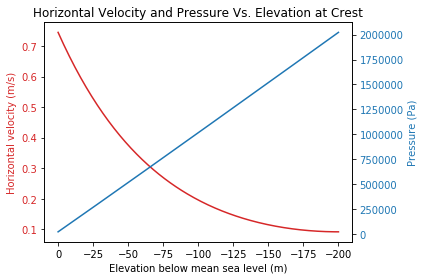

In [298]:
y = df_crest['z']
data1 = df_crest['u']
data2 = df_crest['p']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Elevation below mean sea level (m)')
ax1.set_ylabel('Horizontal velocity (m/s)', color=color)
ax1.plot(y, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Pressure (Pa)', color=color)  # we already handled the x-label with ax1
ax2.plot(y, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.gca().invert_xaxis()

plt.title('Horizontal Velocity and Pressure Vs. Elevation at Crest')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [299]:
df_dc = pd.DataFrame(columns=['z'], data=numbers)
df_dc['x'] = 112.804647
df_dc['eta'] = 0

df_dc['u'] = a_freq*((np.cosh(k*(h_0+df_dc['z'])))/(np.sinh(k*h_0)))* df_dc['eta'] # m/s
df_dc['p'] = (rho*g*df_dc['eta'])*((np.cosh(k*(h_0+df_dc['z'])))/np.cosh(k*h_0)) - (rho*g*df_dc['z']) # Pa

In [300]:
df_dc.head()

,z,x,eta,u,p
0,0,112.804647,0,0.0,0.0
1,-1,112.804647,0,0.0,10104.3
2,-2,112.804647,0,0.0,20208.6
3,-3,112.804647,0,0.0,30312.9
4,-4,112.804647,0,0.0,40417.2


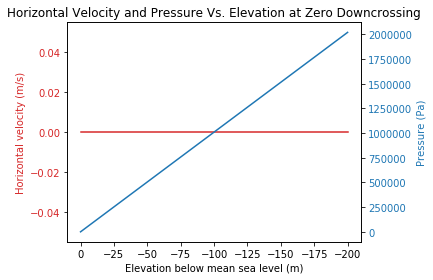

In [301]:
y = df_dc['z']
data1 = df_dc['u']
data2 = df_dc['p']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Elevation below mean sea level (m)')
ax1.set_ylabel('Horizontal velocity (m/s)', color=color)
ax1.plot(y, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Pressure (Pa)', color=color)  # we already handled the x-label with ax1
ax2.plot(y, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.gca().invert_xaxis()

plt.title('Horizontal Velocity and Pressure Vs. Elevation at Zero Downcrossing')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [302]:
df_trough = pd.DataFrame(columns=['z'], data=numbers)
df_trough['x'] = 225.609294
df_trough['eta'] = -2.00

df_trough['u'] = a_freq*((np.cosh(k*(h_0+df_trough['z'])))/(np.sinh(k*h_0)))* df_trough['eta'] # m/s
df_trough['p'] = (rho*g*df_trough['eta'])*((np.cosh(k*(h_0+df_trough['z'])))/np.cosh(k*h_0)) - (rho*g*df_trough['z']) # Pa

In [303]:
df_trough.head()

,z,x,eta,u,p
0,0,225.609294,-2.0,-0.744853,-20208.600000
1,-1,225.609294,-2.0,-0.734632,-9826.983498
2,-2,225.609294,-2.0,-0.724553,550.768194
3,-3,225.609294,-2.0,-0.714615,10924.708102
4,-4,225.609294,-2.0,-0.704815,21294.888509


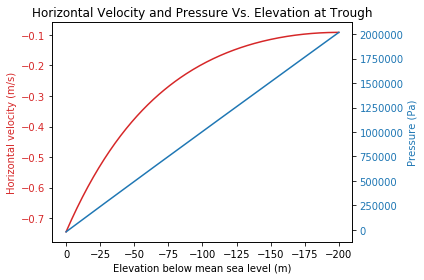

In [304]:
y = df_trough['z']
data1 = df_trough['u']
data2 = df_trough['p']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Elevation below mean sea level (m)')
ax1.set_ylabel('Horizontal velocity (m/s)', color=color)
ax1.plot(y, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Pressure (Pa)', color=color)  # we already handled the x-label with ax1
ax2.plot(y, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.gca().invert_xaxis()
plt.title('Horizontal Velocity and Pressure Vs. Elevation at Trough')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [305]:
df_uc = pd.DataFrame(columns=['z'], data=numbers)
df_uc['x'] = 338.413941
df_uc['eta'] = 0

df_uc['u'] = a_freq*((np.cosh(k*(h_0+df_uc['z'])))/(np.sinh(k*h_0)))* df_uc['eta'] # m/s
df_uc['p'] = (rho*g*df_uc['eta'])*((np.cosh(k*(h_0+df_uc['z'])))/np.cosh(k*h_0)) - (rho*g*df_uc['z']) # Pa

In [306]:
df_uc.head()

,z,x,eta,u,p
0,0,338.413941,0,0.0,0.0
1,-1,338.413941,0,0.0,10104.3
2,-2,338.413941,0,0.0,20208.6
3,-3,338.413941,0,0.0,30312.9
4,-4,338.413941,0,0.0,40417.2


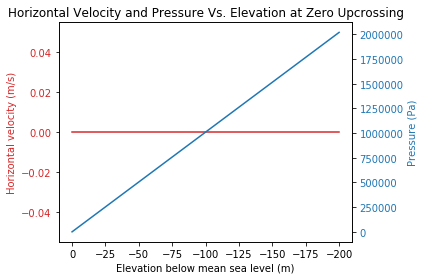

In [307]:
y = df_uc['z']
data1 = df_uc['u']
data2 = df_uc['p']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Elevation below mean sea level (m)')
ax1.set_ylabel('Horizontal velocity (m/s)', color=color)
ax1.plot(y, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Pressure (Pa)', color=color)  # we already handled the x-label with ax1
ax2.plot(y, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.gca().invert_xaxis()
plt.title('Horizontal Velocity and Pressure Vs. Elevation at Zero Upcrossing')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Discuss
The horizontal velocity was positive at the crest, 0 at the zero upcrossing and zero downcrossing, and then negative at the trough. If you watch a wave tank, this horizontal orbital motion makes sense. It was in phase with the free surface elevation, u was maximum when eta was maximum. The pressure was slightly higher throughout the water column under the wave crest compared with the trough or zero down/upcrossings. 

Because of the deepwater assumption, the horizontal velocity is not supposed to interact with bottom friction forces. However, you can see in the graph that at the approximate value of 100 m below the mean water line, the curve has an elbow and the horizontal velocity sharply slows down. This appears as though the horizontal bottom velocity is "feeling" the bottom and therefore the deepwater assumption is not valid.

In order for the deepwater assumption to be valid, k*h>pi and h/L > 1/2. In this problem, k*h is 2.8 and h/L is 0.44, so the limits are not met and the deepwater assumption may not be valid. However, when solving for the exact solution of wavelength (below), using the dispersion equations, I found the wavelength to be 447.9, whiloe assuming deepwater I found an answer of 451.2. This is an error of less than 1% and tells me that the deepwater assumption coudl be adequate, depending on the application and accuracy needs. 

In [317]:
sol = [0]
solindex = 0

iteration = 0
initial_guess = 451.2185876104016 # input initial wavelength guess
L = initial_guess

_break = True

while _break == True: 
    previous_guess = L
    k = (2*pi)/L
    L = ((g * (T**2)) / (2*pi)) * math.tanh(k * h_0)
    error = abs(L-previous_guess) # calculate error
    if (error <= 0.000000001) or (error == 0): # break when the error threshold is met
        _break = False
    iteration += 1

sol[solindex] = L #converged solution added
solindex += 1

In [318]:
sol[0]

447.92960167657566

-----------
-----------
-----------
-----------

Question 4

In [396]:
H_0 = 4.00 # m
h_0 = 200 # m
L_0 = 451.2185876104016 # m (solution from above)

h_1 = 8.00 # m

alpha_0_deg = 40.0 # degrees
alpha_0_rad = (alpha_0_deg * math.pi) / 180

T = 17.0 #s
a_freq = (2 * math.pi)/T #s^-1

In [397]:
# calc L_1 assume shallow
L_1 = T * math.sqrt(g * h_1)

In [398]:
L_1

150.6011952143807

In [337]:
# # calc L_1 with iteration
# L_1_guess = ((g*T**2)/(2*pi))*(math.tanh((((2*pi)/T)*((h_1/g)**0.5))**(3/2)))**(2/3) # (m) first guess with fenton and mckee

In [338]:
# L_1_guess

149.3725748179091

In [339]:
# sol = [0]
# solindex = 0

# iteration = 0
# initial_guess = L_1_guess # input initial wavelength guess
# L = initial_guess

# _break = True

# while _break == True: 
#     previous_guess = L
#     k = (2*pi)/L
#     L = ((g * (T**2)) / (2*pi)) * math.tanh(k * h_1)  # INPUT CORRECT h
#     error = abs(L-previous_guess) # calculate error
#     if (error <= 0.000000001) or (error == 0): # break when the error threshold is met
#         _break = False
#     iteration += 1

# sol[solindex] = L #converged solution added
# solindex += 1 

In [340]:
# L_1 = sol[0]
# L_1

147.80032847773637

In [381]:
# solve
k_1 = (2*math.pi)/L_1 # m^-1

In [382]:
alpha_1_rad = (L_1/L_0)*math.sin(alpha_0_rad)

Kr = ((math.cos(alpha_0_rad))/math.cos(alpha_1_rad))**(0.5)

In [383]:
n_1 = 0.5*(1 + (2*k_1*h_1)/(math.sinh(2*k_1*h_1)))
n_0 = 0.5

In [384]:
Ks = math.sqrt((n_0 * L_0)/(n_1 * L_1))

In [385]:
H_1 = H_0*Ks*Kr

In [386]:
H_1 # m 

4.413559008330478

In [387]:
print('The wave height when the wave reaches a depth of 8.00 m is {0: .2f} m '.format(H_1))

The wave height when the wave reaches a depth of 8.00 m is  4.41 m 


### DISCUSS
When assuming shallow water, the wave height calcualted is 4.41. When soliving with the dispersion equations, the wave height calculated is 4.46. This results in an error of 1.1%. In order for the shallow water limit to be valid, h/L < 1/20, this means you either need to have a shallow depth of a long wavelength. When dividing h/L for htis problem, the result is 0.053, which is very close to meeting the limit needed, therefore the shallow water assumption is valid. The solution makes sense because the wave increased in height and the wavelength compressed due to shoaling as the wave entered shallow waters.

-----------
-----------
-----------
-----------

Question 5

In [208]:
h = 5.00 #m
T = 15.0 #s
H_A = 2.00 #m

In [209]:
# shallow
L = T * math.sqrt(g*h)

In [210]:
L

105.05355776935876

In [211]:
r = math.sqrt((70**2) + (30**2))
r

76.15773105863909

In [212]:
Beta = math.degrees(math.atan(70/30))
Beta

66.80140948635182

In [213]:
r/L

0.7249419503320449

In [215]:
# looking at figures 2-35 and 2-36, values of 0.28 and 0.25, respectively

In [399]:
0.28 + ((0.28-0.25)/(120-135))*10

0.26

In [400]:
H_B = (.26 * 2.00)
H_B

0.52

In [401]:
print('The wave height behind the breakwater is {0: .2f} m '.format(H_B))

The wave height behind the breakwater is  0.52 m 
